<h1 style=" text-align : center;  font-family: 'JetBrains Mono'; color: purple;"><b>GROUP4- MALL WART ECOMMERCE PLATFORM DATAVISUALIZATION </b></h1>


In [7]:
#Import several module
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


%pip --quiet install dash
%pip --quiet install plotly

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


<h3 style="text-align: left; font-family: 'Jetbrains Mono'; color: black;"><b></b></h3>


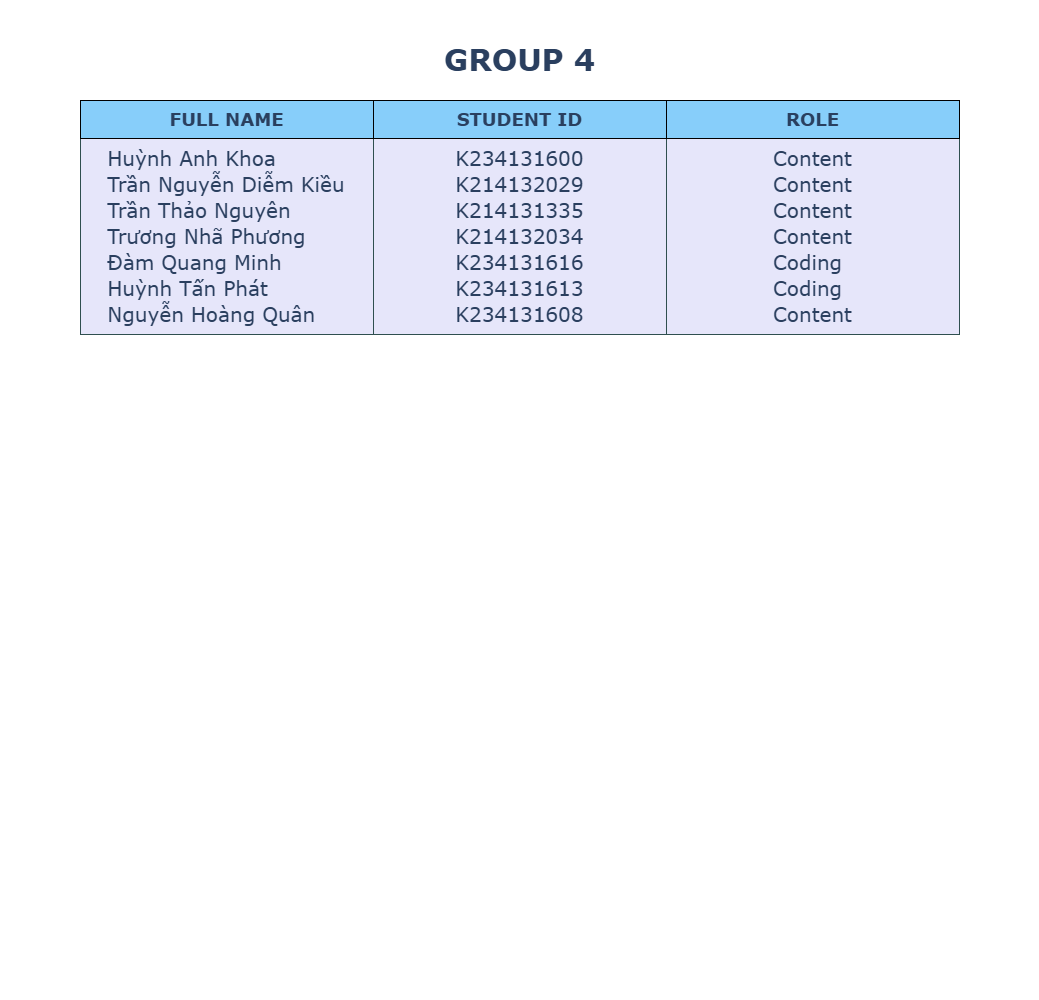

In [249]:

names = ['Huỳnh Anh Khoa', 'Trần Nguyễn Diễm Kiều', 'Trần Thảo Nguyên', 'Trương Nhã Phương', 'Đàm Quang Minh', 'Huỳnh Tấn Phát', 'Nguyễn Hoàng Quân']
ids = ['K234131600', 'K214132029', 'K214131335', 'K214132034', 'K234131616', 'K234131613', 'K234131608']
roles = ['Content', 'Content', 'Content', 'Content', 'Coding', 'Coding', 'Content']
merged_name = '<br>'.join(names)
merged_id = '<br>'.join(ids)
merged_role = '<br>'.join(roles)

new_names = [merged_name]
new_ids = [merged_id]
new_roles = [merged_role]

# Increase font size and height for a larger table, and center-align all text
fig = go.Figure(data=[go.Table(
    header=dict(values=['<b>FULL NAME</b>', '<b>STUDENT ID</b>', '<b>ROLE</b>'],
                line_color='black',
                fill_color='lightskyblue',
                align='center',  
                font=dict(size=18)),
    cells=dict(values=[new_names, new_ids, new_roles],
               line_color='darkslategrey',
               fill_color='lavender',
               align='center',  #
               font=dict(size=20),
               height=35))
])

fig.update_layout(
    width=1000, 
    height=1000,  
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title=dict(
        text='<b>GROUP 4</b>',
        x=0.5,
        y=0.95,
        font=dict(
            size=30  
    )
)

fig.show()


In [8]:
df = pd.read_csv("C:/Users/phath/Downloads/archive (61)/project1_df.csv")
df.head(3)

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location
0,943146,5876328741,Female,25-45,30/08/2023 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.304000,661.004000,Credit Card,Ahmedabad
1,180079,1018503182,Male,25-45,23/02/2024 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,4463.801875,Credit Card,Bangalore
2,337580,3814082218,Other,60 and above,06/03/2022 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,1774.832575,Credit Card,Delhi


<h3 style="text-align: left; font-family: 'Jetbrains Mono'; color: red;"><b>1. INTRODUCTION</b></h3>


<h3 style="text-align: left; font-family: 'Jetbrains Mono'; color: red;"><b>2. OVERVIEW</b></h3>


<h3 style="text-align: left; font-family: 'Jetbrains Mono'; color: red;"><b>3. VISUALIZATION</b></h3>


<h5 style="text-align: left; font-family: 'Jetbrains Mono'; color: black;"><b>3.1. BAR CHART: DIFFERENCES QUANTITY PRODUCT CATEGORIES</b></h5>


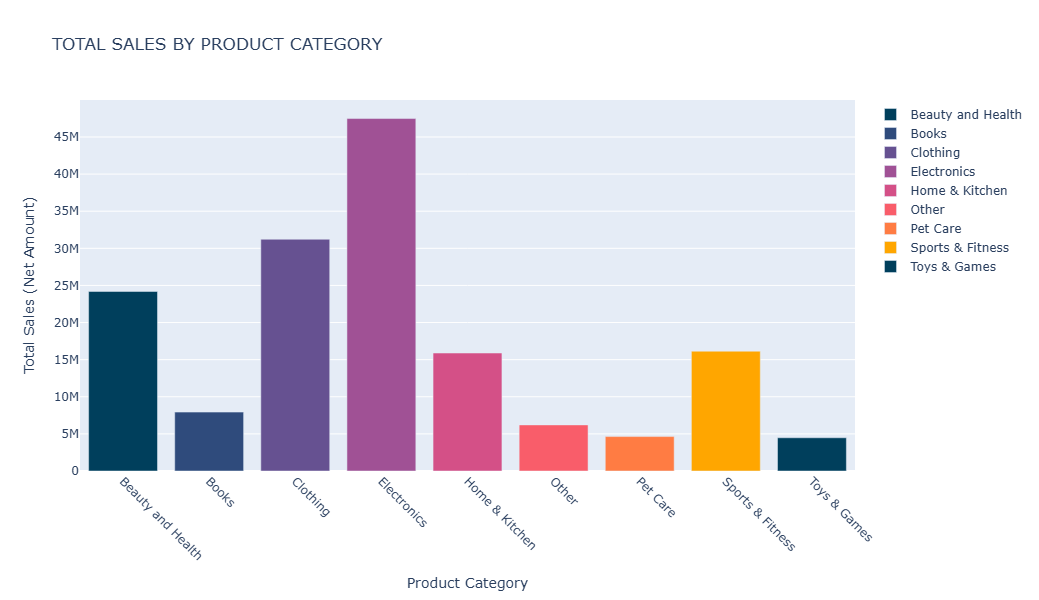

In [266]:
import plotly.graph_objects as go
import pandas as pd

prod_cat_sales = df.groupby('Product Category')['Net Amount'].sum().reset_index()

color_palette = ['#003f5c', '#2f4b7c', '#665191', '#a05195', '#d45087', '#f95d6a', '#ff7c43', '#ffa600']

fig = go.Figure()


for i, category in enumerate(prod_cat_sales['Product Category'].unique()):
    fig.add_trace(go.Bar(
        x=[category],
        y=[prod_cat_sales.loc[prod_cat_sales['Product Category'] == category, 'Net Amount'].values[0]],
        marker=dict(color=color_palette[i % len(color_palette)]),
        name=category
    ))


fig.update_layout(
    title='TOTAL SALES BY PRODUCT CATEGORY',
    xaxis_title='Product Category',
    yaxis_title='Total Sales (Net Amount)',
    xaxis=dict(tickangle=45),  
    autosize=False,
    width=800, 
    height=600  
)

fig.show();


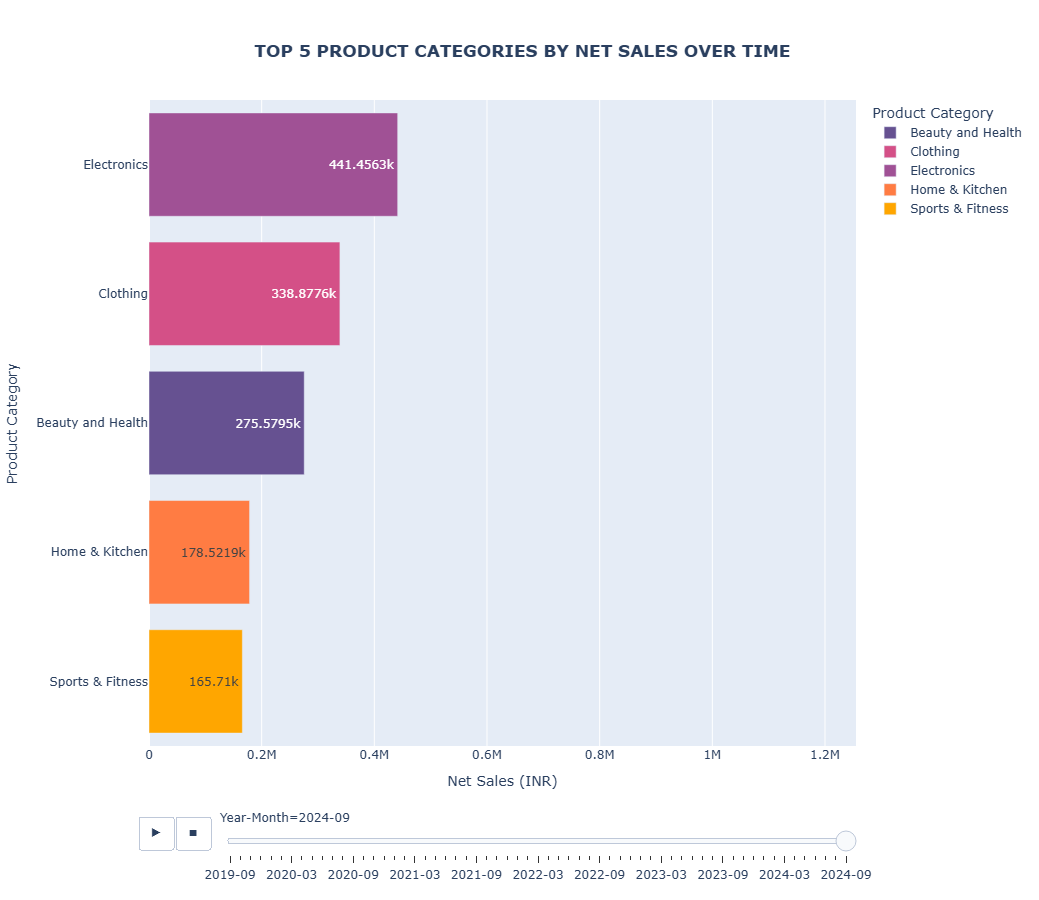

In [57]:
import pandas as pd
import plotly.express as px


df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], format='%d/%m/%Y %H:%M')

color_hex = ['#665191', '#d45087', '#a05195', '#ff7c43', '#ffa600']  

df['Year-Month'] = df['Purchase Date'].dt.to_period('M')
pd
df_grouped = df.groupby(['Year-Month', 'Product Category'])['Net Amount'].sum().reset_index()


df_grouped['Rank'] = df_grouped.groupby('Year-Month')['Net Amount'].rank(method='first', ascending=False)

df_top5 = df_grouped[df_grouped['Rank'] <= 5]


category_colors = dict(zip(df_top5['Product Category'].unique(), color_hex))

# Step 5: Create the animated bar chart race
fig = px.bar(
    df_top5,
    x='Net Amount',
    y='Product Category',
    color='Product Category',
    animation_frame='Year-Month',
    animation_group='Product Category',
    title="<b> TOP 5 PRODUCT CATEGORIES BY NET SALES OVER TIME<b>",
    labels={'Net Amount': 'Net Sales (INR)', 'Product Category': 'Product Category'},
    orientation='h', 
    text='Net Amount',
    text_auto= True,
    
    color_discrete_map=category_colors  
)

fig.update_layout(
    xaxis_title="Net Sales (INR)",
    yaxis_title="Product Category",
    xaxis=dict(range=[0, df_top5['Net Amount'].max() * 1.1]),
    yaxis={'categoryorder': 'total ascending'}, 
    showlegend=True,   
    title_x=0.5,  
    title_y=0.95,  
    width=1005,  
    height=900
)

fig.show()


<h5 style="text-align: left; font-family: 'Jetbrains Mono'; color: black;"><b>3.1. HISTOGRAM: NET AMOUNTS AND GROSS AMOUNT</b></h5>


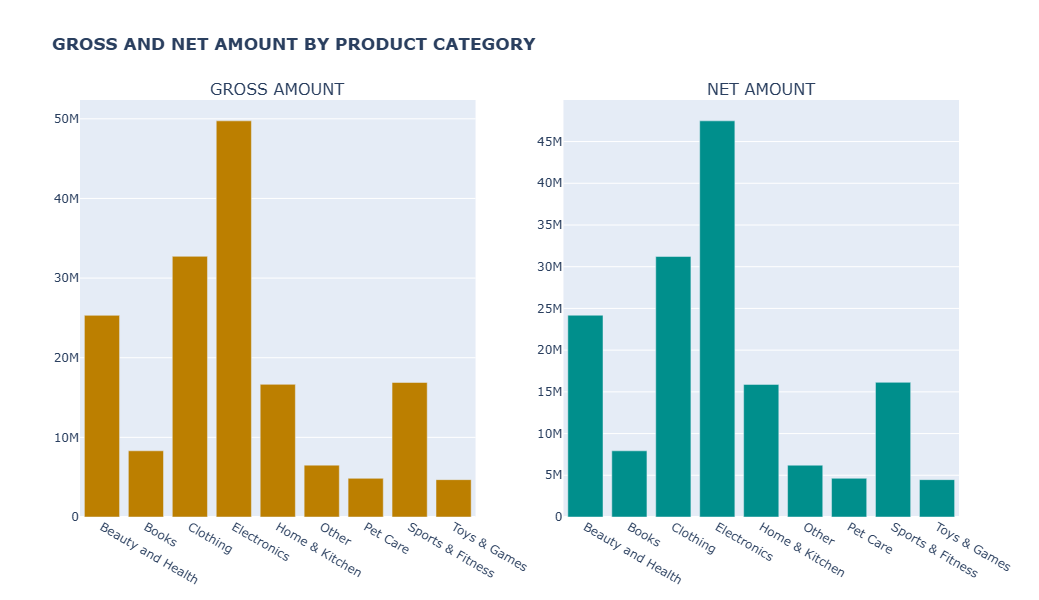

In [229]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

product_category_gross = df.groupby('Product Category')['Gross Amount'].sum().reset_index()
product_category_net = df.groupby('Product Category')['Net Amount'].sum().reset_index()

#PLOT1
fig = make_subplots(rows=1, cols=2, subplot_titles=("GROSS AMOUNT", "NET AMOUNT"))

fig.add_trace(go.Bar(x=product_category_gross['Product Category'],
                     y=product_category_gross['Gross Amount'],
                     marker=dict(color='#bc7f00'),
                     name='Gross Amount'),
              row=1, col=1)
#PLOT2
fig.add_trace(go.Bar(x=product_category_net['Product Category'],
                     y=product_category_net['Net Amount'],
                     marker=dict(color='#008f8c'),
                     name='Net Amount'),
              row=1, col=2)

fig.update_layout(
    title_text="<b>GROSS AND NET AMOUNT BY PRODUCT CATEGORY<b>", 
    height=600, 
    width=1000,
    showlegend=False
)

fig.show()


<h5 style="text-align: left; font-family: 'Jetbrains Mono'; color: black;"><b>3.2. PIE & LINE CHART: PURCHASE METHOD</b></h5>


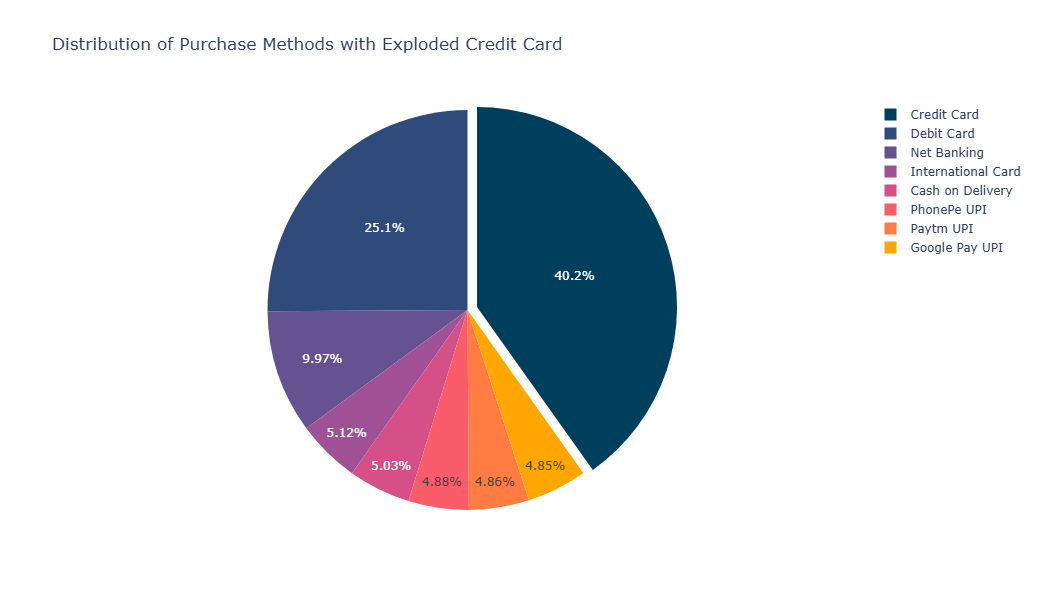

In [160]:


purchase_method_counts = df['Purchase Method'].value_counts()
color_sequence = [
    '#003f5c', '#2f4b7c', '#665191', '#a05195', 
    '#d45087', '#f95d6a', '#ff7c43', '#ffa600'
]

pull_values = [0.05 if method == "Credit Card" else 0 for method in purchase_method_counts.index]

fig = go.Figure(
    data=[go.Pie(
        labels=purchase_method_counts.index, 
        values=purchase_method_counts.values,
        marker=dict(colors=color_sequence),
        pull=pull_values, 
    )]
)


fig.update_layout(
    title='Distribution of Purchase Methods with Exploded Credit Card',
    width=800,  
    height=600  
)

fig.show()


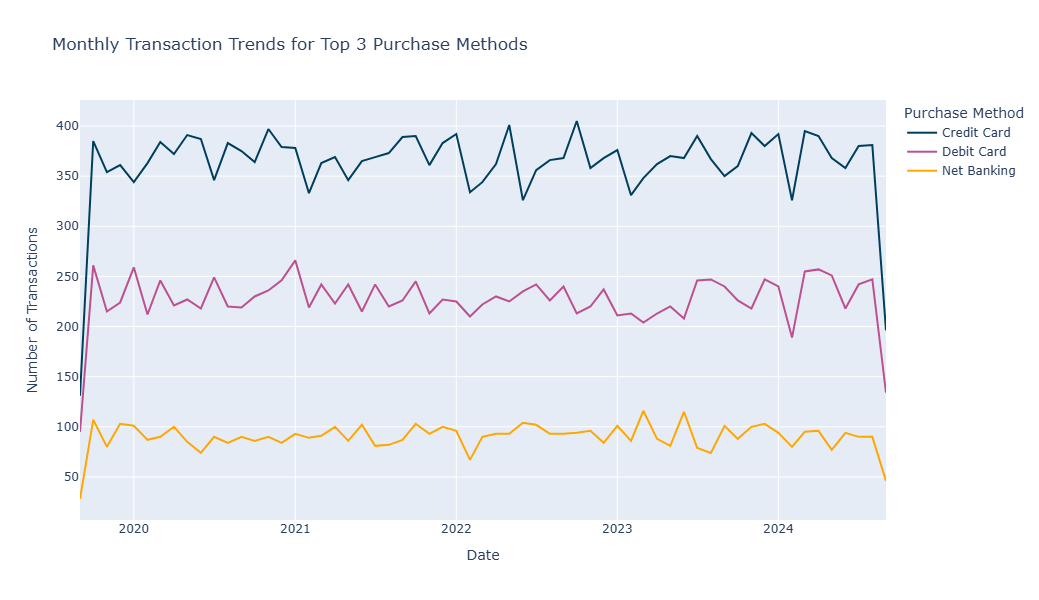

In [73]:
import pandas as pd
import plotly.express as px


df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], dayfirst=True)
df['YearMonth'] = df['Purchase Date'].dt.to_period('M')


top_purchase_methods = df['Purchase Method'].value_counts().nlargest(3).index


top_methods_df = df[df['Purchase Method'].isin(top_purchase_methods)]


monthly_top_methods_counts = top_methods_df.groupby(['YearMonth', 'Purchase Method']).size().reset_index(name='Transaction Count')
monthly_top_methods_counts['YearMonth'] = monthly_top_methods_counts['YearMonth'].dt.to_timestamp()

color_map = {
    "Credit Card": "#003f5c",
    "Debit Card": "#bc5090",
    "Net Banking": "#ffa600"
}

fig = px.line(
    monthly_top_methods_counts,
    x='YearMonth',
    y='Transaction Count',
    color='Purchase Method',
    title='Monthly Transaction Trends for Top 3 Purchase Methods',
    labels={'YearMonth': 'Date', 'Transaction Count': 'Number of Transactions'},
    color_discrete_map=color_map  # Apply custom colors
)

fig.update_layout(width=1000, height=600) 

# Display the plot
fig.show()


<h5 style="text-align: left; font-family: 'Jetbrains Mono'; color: black;"><b>3.2. HIST & BOX CHART: GROUP SEGMENTS, EMPHASIZE IN GROUP 25- 45</b></h5>


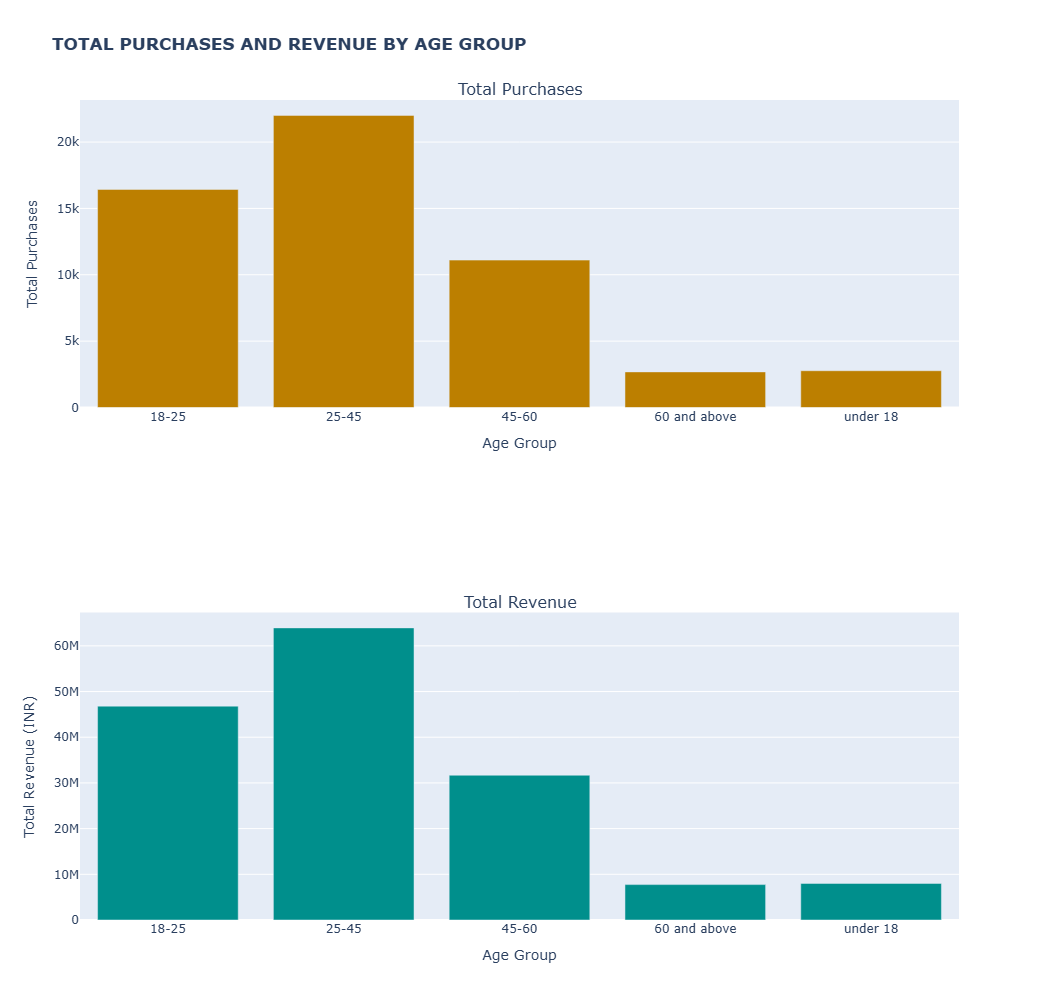

In [65]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd


agegroup_summary = df.groupby('Age Group').agg(
    total_purchases=('CID', 'count'),  
    total_revenue=('Net Amount', 'sum')  
).reset_index()


fig = make_subplots(rows=2, cols=1, subplot_titles=("Total Purchases", "Total Revenue"))

fig.add_trace(go.Bar(
    x=agegroup_summary['Age Group'],
    y=agegroup_summary['total_purchases'],
    name='Total Purchases',
    marker=dict(color='#bc7f00')
), row=1, col=1)


fig.add_trace(go.Bar(
    x=agegroup_summary['Age Group'],
    y=agegroup_summary['total_revenue'],
    name='Total Revenue (INR)',
    marker=dict(color='#008f8c')
), row=2, col=1)


fig.update_layout(
    title_text="<b>TOTAL PURCHASES AND REVENUE BY AGE GROUP",
    height=1000, 
    width = 1000,
    showlegend=False
)

fig.update_xaxes(title_text="Age Group", row=1, col=1)
fig.update_yaxes(title_text="Total Purchases", row=1, col=1)
fig.update_xaxes(title_text="Age Group", row=2, col=1)
fig.update_yaxes(title_text="Total Revenue (INR)", row=2, col=1)

# Show the plots
fig.show()


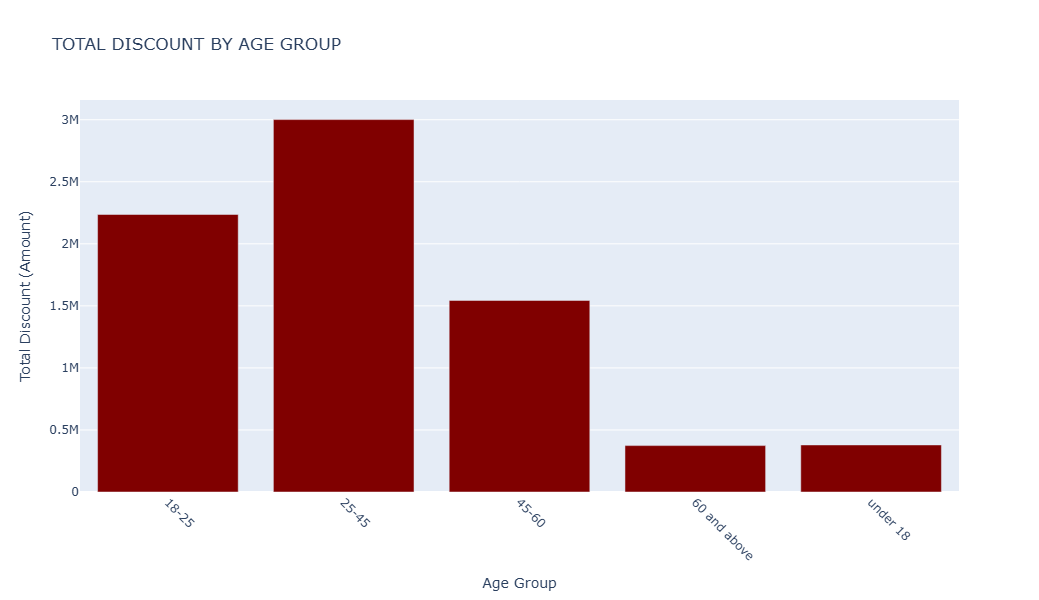

In [241]:
import pandas as pd
import plotly.graph_objects as go


genderdisc_sales = df.groupby('Age Group')['Discount Amount (INR)'].sum().reset_index()


fig = go.Figure(data=[
    go.Bar(
        x=genderdisc_sales['Age Group'],
        y=genderdisc_sales['Discount Amount (INR)'],
        marker=dict(color='maroon')
    )
])


fig.update_layout(
    title='TOTAL DISCOUNT BY AGE GROUP',
    xaxis_title='Age Group',
    yaxis_title='Total Discount (Amount)',
    xaxis=dict(tickangle=45),
    autosize=False,
    width=1000,  
    height=600  

# Show the plot
fig.show()


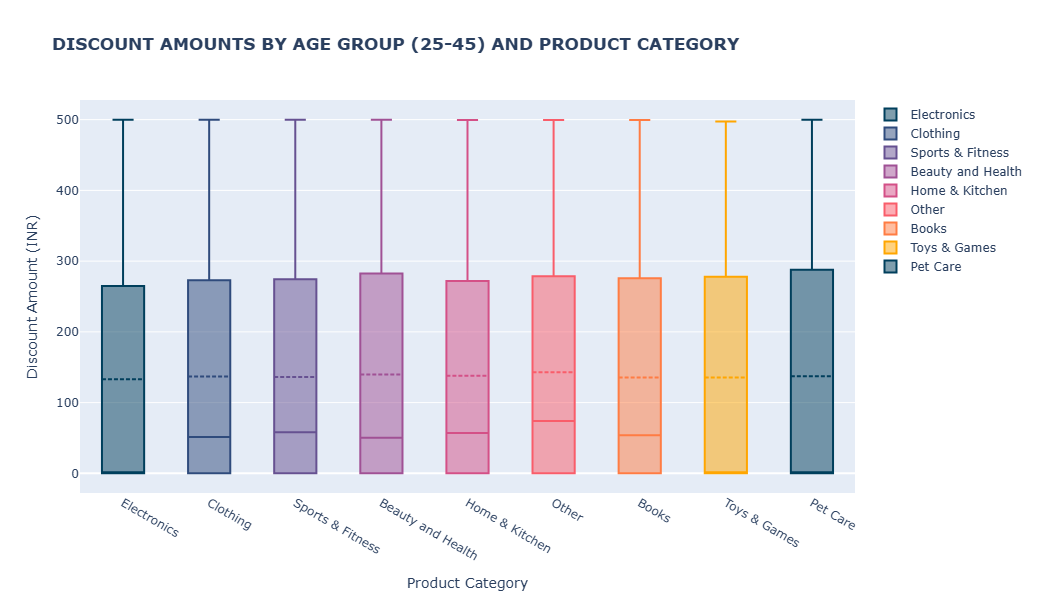

In [61]:
import plotly.graph_objects as go
import pandas as pd

df_filtered = df[df['Age Group'] == '25-45']

color_palette = ['#003f5c', '#2f4b7c', '#665191', '#a05195', '#d45087', '#f95d6a', '#ff7c43', '#ffa600']


fig = go.Figure()

for i, category in enumerate(df_filtered['Product Category'].unique()):
    fig.add_trace(go.Box(
        x=[category] * len(df_filtered[df_filtered['Product Category'] == category]['Discount Amount (INR)']),
        y=df_filtered[df_filtered['Product Category'] == category]['Discount Amount (INR)'],
        name=category,
        marker_color=color_palette[i % len(color_palette)], 
        boxmean=True 
    ))

# Update layout
fig.update_layout(
    title='<b>DISCOUNT AMOUNTS BY AGE GROUP (25-45) AND PRODUCT CATEGORY',
    xaxis_title='Product Category',
    yaxis_title='Discount Amount (INR)',
    width=1000,  
    height=600, 
    showlegend=True  
)

# Show the plot
fig.show()


In [33]:
# Import packages
from dash import Dash, html, dash_table, dcc
import pandas as pd
import plotly.express as px

# Incorporate data
df = pd.read_csv("C:/Users/phath/Downloads/archive (5)/project1_df.csv")

# Initialize the app
app = Dash()

# App layout
app.layout = [
    html.Div(children='WALL MART PLATFORM VISUALIZATION', style = {"color":"blue"}),
    dash_table.DataTable(data=df.to_dict('records'), page_size=10),
    dcc.Graph(figure=px.histogram(df, x='Gender', y='Net Amount', histfunc='avg'))
]

# Run the app
if __name__ == '__main__':
    app.run(debug=True)


<h5 style="text-align: left; font-family: 'Jetbrains Mono'; color: black;"><b>3.1. DENSITY & CHOROPHRETH CHART: DIFFERENCES QUANTITY PRODUCT CATEGORIES</b></h5>


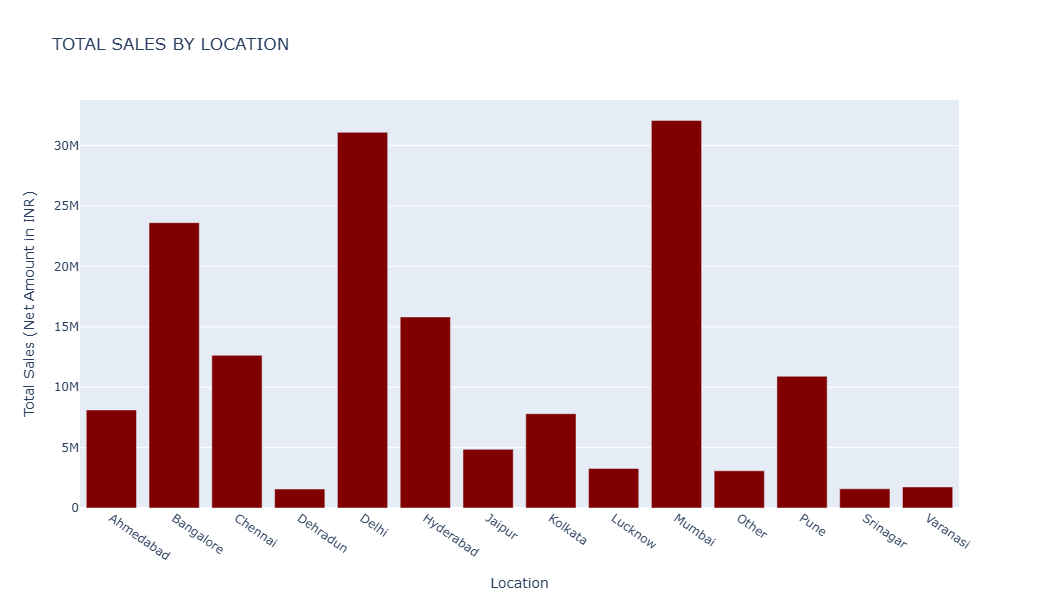

In [245]:
import pandas as pd
import plotly.graph_objects as go

location_sales = df.groupby('Location')['Net Amount'].sum().reset_index()

fig = go.Figure(data=[
    go.Bar(
        x=location_sales['Location'],
        y=location_sales['Net Amount'],
        marker=dict(color='maroon')
    )
])

fig.update_layout(
    title='TOTAL SALES BY LOCATION',
    xaxis_title='Location',
    yaxis_title='Total Sales (Net Amount in INR)',
    xaxis=dict(tickangle=35), 
    autosize=False,
    width=1000,  
    height=600  
)

fig.show()


In [ ]:
px.choropleth_map()

In [81]:
import seaborn as sns
sns.heatmap(df["Discount Amount (INR)"], cmap  = "plasma")
plt.show()

IndexError: Inconsistent shape between the condition and the input (got (55000, 1) and (55000,))

<h3 style="text-align: left; font-family: 'Jetbrains Mono'; color: red;"><b>RECOMMENDATION: </b></h3>

<h3 style="text-align: left; font-family: 'Jetbrains Mono'; color: red;"><b>CONCLUSION: </b></h3>

<h3 style="text-align: left; font-family: 'Jetbrains Mono'; color: red;"><b>REFERENCE: </b></h3>

